<a href="https://colab.research.google.com/github/kushagrasharma-13/Convolutional_Neural_Network/blob/main/CNN_Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN on Animal Data-set

In [ ]:
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
unzip = zipfile.ZipFile("/content/drive/MyDrive/Python/Datasets/Animals_Dataset.zip",'r')
file_paths = unzip.namelist()
for path in file_paths:
  unzip.extract(path)

In [ ]:
train_datagen = IDG(rescale=1./255,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')

In [ ]:
test_datagen = IDG(rescale=1./255)

In [ ]:
pwd

'/content'

In [ ]:
ls

dataset/  drive/  sample_data/


In [ ]:
cd /content/dataset

/content/dataset


In [ ]:
ls

Testing/  Training/


In [ ]:
x_train = train_datagen.flow_from_directory('/content/dataset/Training',
                                            target_size=(255,195),
                                            class_mode='categorical',
                                            batch_size=24)

Found 1238 images belonging to 4 classes.


In [ ]:
x_test = test_datagen.flow_from_directory('/content/dataset/Testing',
                                          target_size=(255,195),
                                          class_mode='categorical',
                                          batch_size=24)

Found 326 images belonging to 4 classes.


In [ ]:
len(x_train)

52

In [ ]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(255,195,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),input_shape=(255,195,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),input_shape=(255,195,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax')) #softmax -> multiclass classification # 4 -> no. of classes

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=2,validation_steps=len(x_test))

<ipython-input-15-c7cb529a27b4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=2,validation_steps=len(x_test))


Epoch 1/2
52/52 [==============================] - 69s 1s/step - loss: 1.3118 - accuracy: 0.3570
Epoch 2/2
52/52 [==============================] - 66s 1s/step - loss: 0.9601 - accuracy: 0.6115


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 193, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 96, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 94, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 45, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 22, 32)       0

In [ ]:
model.save('animal.h5')

In [ ]:
model = load_model('animal.h5',)

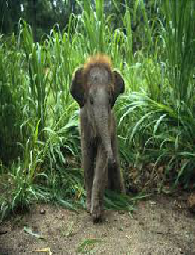

In [ ]:
img = image.load_img("/content/dataset/Testing/elephants/images (43).jpeg",target_size=(255,195))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[ 20.,  40.,  31.],
        [ 32.,  52.,  43.],
        [ 38.,  58.,  49.],
        ...,
        [ 44.,  84.,  34.],
        [ 44.,  82.,  35.],
        [ 43.,  81.,  34.]],

       [[ 20.,  40.,  31.],
        [ 31.,  51.,  42.],
        [ 31.,  51.,  42.],
        ...,
        [ 72., 112.,  62.],
        [ 62.,  99.,  55.],
        [ 53.,  90.,  46.]],

       [[ 20.,  40.,  31.],
        [ 31.,  51.,  42.],
        [ 31.,  51.,  42.],
        ...,
        [ 72., 112.,  62.],
        [ 62.,  99.,  55.],
        [ 53.,  90.,  46.]],

       ...,

       [[ 58.,  66.,  51.],
        [ 54.,  62.,  47.],
        [ 54.,  62.,  51.],
        ...,
        [ 91.,  83.,  72.],
        [ 77.,  73.,  61.],
        [ 80.,  76.,  64.]],

       [[ 58.,  66.,  51.],
        [ 54.,  62.,  47.],
        [ 54.,  62.,  51.],
        ...,
        [ 91.,  83.,  72.],
        [ 77.,  73.,  61.],
        [ 80.,  76.,  64.]],

       [[ 52.,  60.,  45.],
        [ 47.,  55.,  40.],
        [ 40.,  

In [ ]:
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 20.,  40.,  31.],
         [ 32.,  52.,  43.],
         [ 38.,  58.,  49.],
         ...,
         [ 44.,  84.,  34.],
         [ 44.,  82.,  35.],
         [ 43.,  81.,  34.]],

        [[ 20.,  40.,  31.],
         [ 31.,  51.,  42.],
         [ 31.,  51.,  42.],
         ...,
         [ 72., 112.,  62.],
         [ 62.,  99.,  55.],
         [ 53.,  90.,  46.]],

        [[ 20.,  40.,  31.],
         [ 31.,  51.,  42.],
         [ 31.,  51.,  42.],
         ...,
         [ 72., 112.,  62.],
         [ 62.,  99.,  55.],
         [ 53.,  90.,  46.]],

        ...,

        [[ 58.,  66.,  51.],
         [ 54.,  62.,  47.],
         [ 54.,  62.,  51.],
         ...,
         [ 91.,  83.,  72.],
         [ 77.,  73.,  61.],
         [ 80.,  76.,  64.]],

        [[ 58.,  66.,  51.],
         [ 54.,  62.,  47.],
         [ 54.,  62.,  51.],
         ...,
         [ 91.,  83.,  72.],
         [ 77.,  73.,  61.],
         [ 80.,  76.,  64.]],

        [[ 52.,  60.,  45.],
       

In [ ]:
x.ndim

4

In [ ]:
pred = np.argmax(model.predict(x))
print(pred)
#{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}
index = ['bears', 'crows', 'elephants', 'rats']
index[pred]

1/1 [==============================] - 0s 70ms/step
2


'elephants'

In [ ]:
img = image.load_img("/content/dataset/Testing/bears/k4 (100).jpg",target_size=(255,195))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
ele = ['bears', 'crows', 'elephants', 'rats']
ele[pred]

1/1 [==============================] - 0s 62ms/step


'crows'